# Data Mode: Audio 

In [4]:
import torch
import matplotlib.pyplot as plt
import torchaudio #pip install PySoundFile(no mp3) for windows, pip install sox for linux

Plotting Audio Input Data

Shape of waveform: torch.Size([2, 268237])
Sample rate of waveform: 8000


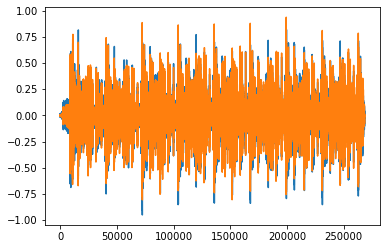

In [5]:
filename = "../Data/audio/demo.wav"

waveform, sample_rate = torchaudio.load(filename)

data = waveform.t().numpy()

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(data)


Getting Spectrogram

Shape of spectrogram: torch.Size([2, 201, 1342])


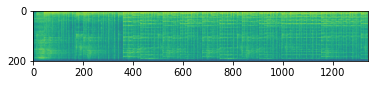

In [6]:
specgram = torchaudio.transforms.Spectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy())

Shape of spectrogram: torch.Size([2, 128, 1342])


/home/shreshthajit/anaconda3/lib/python3.8/site-packages/torchaudio/functional/functional.py:432: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


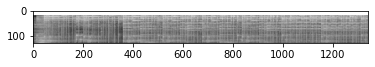

In [11]:
specgram = torchaudio.transforms.MelSpectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy(), cmap='gray')

# Data Mode: Video

In [7]:
import av #conda install -c conda-forge/label/cf202003 av
import pims # conda install -c conda-forge pims

In [8]:
v = pims.Video('../Data/video/dummy.mp4')

# Data Mode: Image

In [9]:
import skimage
import numpy as np
from skimage import transform
from glob import glob

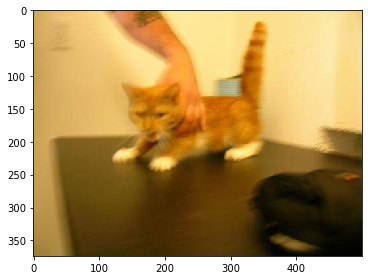

In [10]:
cat_filenames = glob('../Data/image/cats/*.jpg')
image = skimage.io.imread(cat_filenames[0])
skimage.io.imshow(image)

In [11]:
# ricursive glob
all_filenames = glob('../Data/image/**/*.jpg')
all_filenames

['../Data/image/cats/cat.0.jpg',
 '../Data/image/cats/cat.2.jpg',
 '../Data/image/cats/cat.4.jpg',
 '../Data/image/cats/cat.1.jpg',
 '../Data/image/cats/cat.3.jpg',
 '../Data/image/dogs/dog.12189.jpg',
 '../Data/image/dogs/dog.12191.jpg',
 '../Data/image/dogs/dog.12190.jpg',
 '../Data/image/dogs/dog.12192.jpg',
 '../Data/image/dogs/dog.12193.jpg']

In [24]:
motherList = []

for each in all_filenames:
    image = skimage.io.imread(each)
    motherList.append(image)

In [28]:
#np.shape(motherList[2])
#list(motherList)
np.shape(motherList[0])

(374, 500, 3)

In [12]:
boroList= []
for each in all_filenames:
    temp = skimage.io.imread(each)
    temp = skimage.transform.resize(temp, (64,64))
    boroList.append(list(temp))

In [30]:
np.shape(boroList[0])

(64, 64, 3)

# Data Mode: Text

In [31]:
import pandas as pd

In [32]:
wikiData = pd.read_excel('../Data/tabular/wiki.xlsx')

In [33]:
wikiData

,Unnamed: 0,content
0,0,বংশী বাংলাদেশের একটি ক্ষুদ্রতম উপজাতি এরা টাঙ্...
1,1,আবহাওয়াবিদ্যা বা আবহবিদ্যা মানে এককথায় আবহাও...
2,2,কোরিয়ার ওয়ার্কার্স পার্টি হল গণতান্ত্রিক গণপ...
3,3,মোহাম্মদ মোস্তফা কামাল ডিসেম্বর এপ্রিল বাংলাদে...
4,4,মণিপুরী সংস্কৃতির উজ্জ্বলতম দিক হলো মণিপুরী নৃ...
...,...,...
69895,70372,বনু উকায়িল একটি প্রাচীন আরব গোত্র যারা পূর্ব ...
69896,70373,নলুয়ার হাওর বাংলাদেশের সুনামগঞ্জ জেলার জগন্না...
69897,70374,emon kundudate of birth
69898,70375,মইয়ার হাওর বাংলাদেশের সুনামগঞ্জ জেলার জগন্নাথ...


In [34]:
sentence = wikiData.iloc[5]['content']

In [35]:
sentence

'উল্কা হল মহাকাশে পরিভ্রমণরত পাথর বা ধাতু দ্বারা গঠিত ছোট মহাজাগতিক বস্তু যা পৃথিবীর বায়ুমন্ডলে প্রবেশ করলে বায়ুর সংঘর্ষে জ্বলে উঠে তখন একে উল্কাপাত meteor বলে এই উল্কাপাতের জন্য দায়ী বস্তুগুলোকে উল্কা meteoroid বলে উল্কাপিন্ড গ্রহানুর তুলানায় আকারে অনেক ক্ষুদ্র আকারে এরা ছোট ধূলিকনা থেকে মিটার দৈর্ঘ্যের হয়ে থাকে এর চেয়ে ছোট বস্তুকে মহাজাগতিক ধূলিকনা বলে এসব উল্কার বেশীরভাগই গ্রহানু বা ধূমকেতুর অংশবিশেষ বাকী অংশ মহাজাগতিক বস্তুর সংঘর্ষের ফলে সৃষ্ট ধ্বংসাবশেষ যখন কোন উল্কা পৃথিবীর বায়ুমন্ডলে প্রবেশ করে তখন এর গতীবেগ প্রতি সেকেন্ডে কিমি বৃদ্ধিপ্রাপ্ত হয় কিমি ঘন্টা মাইল ঘন্টা এসময়ে এ্যারোডাইনামিক্স তাপের কারনে উজ্জ্বল আলোক ছটার সৃষ্টি হয় এই বাহ্যমূর্তীর কারনে একে তারা খসা shooting star বলে কিছু কিছু উল্কা একই উৎস হতে উৎপন্ন হয়ে বিভিন্ন ক্ষুদ্র ক্ষুদ্র অংশে ভেঙে প্রজ্জ্বলিত হয় যাকে উল্কা বৃষ্টি বলা হয় প্রায় টন পরিমাণ উল্কা ক্ষুদ্র উল্কাকণা এবং মহাজাগতিক ধূলিকনা প্রতি বছর পৃথিবীর বায়ুমন্ডলে প্রবেশ করে'

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
#X_train, X_test, y_train, y_test= train_test_split(wikiData['content'], labels,test_size=0.33)
a, b=train_test_split(wikiData['content'],test_size=0.33)

In [258]:
b

47503    গাম্বিয়া বাংলাদেশ সম্পর্ক হল গাম্বিয়া ও বাংল...
9541                  গ্রেগরীয় বর্ষপঞ্জীর একটি সাধারণ বছর
35535    হিজলি ডিটেনশন ক্যাম্প ইংরেজি hijli detention c...
43282    লিভোফ্লক্সাসিন ফ্লুরোকুইনোলোন্স গ্রুপের একটি অ...
15476    সত্যাগ্রহ সংস্কৃত মোহনদাস করমচাঁদ গান্ধীর প্রত...
                               ...                        
47354    সেনুয়া নদী বাংলাদেশের উত্তর পশ্চিমাঞ্চলের ঠাক...
27589    কার্লোস জুয়ান ফিনলে ডিসেম্বর আগস্ট ছিলেন একজন...
46002    হেমনগর জমিদার বাড়ি বাংলাদেশের টাঙ্গাইল জেলার ...
23306    অন্ধ বা অন্ধত্ব কোন কিছুকে দেখার সক্ষমতাহীনতা ...
47105    লিওন রাসেল এপ্রিল নভেম্বর ছিলেন একজন জনপ্রিয় ...
Name: content, Length: 23067, dtype: object